In [1]:
import pandas as pd
import numpy as np

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [ ]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# code here

# Covid Cases Dataset Question

In [2]:
confirm = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('data/time_series_covid19_deaths_global.csv')

In [6]:
confirm.head(2)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,0,0,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812


In [7]:
deaths.head(2)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595


In [5]:
confirm.drop(columns=['Lat','Long'],inplace = True)
deaths.drop(columns=['Lat','Long'],inplace = True)

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [14]:
# melted dfs
confirm_dbr = confirm.melt(id_vars=['Province/State','Country/Region'],var_name= 'Date',value_name='nos_confirm')
deaths_dbr = deaths.melt(id_vars=['Province/State','Country/Region'],var_name= 'Date',value_name='nos_deaths')

In [15]:
print(confirm_dbr.info())
print('-'*30)
print(deaths_dbr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311253 entries, 0 to 311252
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  98007 non-null   object
 1   Country/Region  311253 non-null  object
 2   Date            311253 non-null  object
 3   nos_confirm     311253 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.5+ MB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311253 entries, 0 to 311252
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  98007 non-null   object
 1   Country/Region  311253 non-null  object
 2   Date            311253 non-null  object
 3   nos_deaths      311253 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.5+ MB
None


In [17]:
covid_merged = confirm_dbr.merge(deaths_dbr,on = ['Province/State','Country/Region','Date'],how = 'outer')

In [18]:
covid_merged.sample(4)

,Province/State,Country/Region,Date,nos_confirm,nos_deaths
282522,NaN,Lesotho,9/25/22,34490,706
36909,NaN,Nigeria,5/28/20,8915,259
191923,NaN,Bhutan,11/16/21,2625,3
16849,Tianjin,China,3/20/20,137,3


In [19]:
covid_merged.set_index(['Country/Region','Province/State'],inplace=True)

In [20]:
covid_merged

,,Date,nos_confirm,nos_deaths
Country/Region,Province/State,,,
Afghanistan,NaN,1/22/20,0,0
Albania,NaN,1/22/20,0,0
Algeria,NaN,1/22/20,0,0
Andorra,NaN,1/22/20,0,0
Angola,NaN,1/22/20,0,0
...,...,...,...,...
West Bank and Gaza,NaN,1/2/23,703228,5708
Winter Olympics 2022,NaN,1/2/23,535,0
Yemen,NaN,1/2/23,11945,2159


###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

### Note: Since data is cumulative day-wise, we only need to take the last date ie 1/2/23

In [30]:
cumulative_df = covid_merged[covid_merged['Date']=='1/2/23'].groupby('Country/Region').sum()

C:\Users\abhid\AppData\Local\Temp\ipykernel_20296\65226545.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cumulative_df = covid_merged[covid_merged['Date']=='1/2/23'].groupby('Country/Region').sum()


In [31]:
cumulative_df['death_percent'] = np.round(100*cumulative_df['nos_deaths']/cumulative_df['nos_confirm'],2)

In [32]:
cumulative_df.sort_values('death_percent',ascending=False)

,nos_confirm,nos_deaths,death_percent
Country/Region,,,
"Korea, North",1,6,600.00
MS Zaandam,9,2,22.22
Yemen,11945,2159,18.07
Sudan,63686,4994,7.84
Syria,57423,3163,5.51
...,...,...,...
Summer Olympics 2020,865,0,0.00
Holy See,29,0,0.00
Antarctica,11,0,0.00


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [41]:
india_covid = covid_merged.loc['India']

In [45]:
india_covid

,Date,nos_confirm,nos_deaths,prev_day_cases,new_cases
Province/State,,,,,
NaN,1/22/20,0,0,NaN,NaN
NaN,1/23/20,0,0,0.0,0.0
NaN,1/24/20,0,0,0.0,0.0
NaN,1/25/20,0,0,0.0,0.0
NaN,1/26/20,0,0,0.0,0.0
...,...,...,...,...,...
NaN,12/29/22,44679382,530699,44679139.0,243.0
NaN,12/30/22,44679608,530702,44679382.0,226.0
NaN,12/31/22,44679873,530705,44679608.0,265.0


In [44]:
india_covid['prev_day_cases'] = india_covid['nos_confirm'].shift(1)
india_covid['new_cases'] = india_covid['nos_confirm'] - india_covid['prev_day_cases']

C:\Users\abhid\AppData\Local\Temp\ipykernel_20296\1127843779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_covid['prev_day_cases'] = india_covid['nos_confirm'].shift(1)
C:\Users\abhid\AppData\Local\Temp\ipykernel_20296\1127843779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_covid['new_cases'] = india_covid['nos_confirm'] - india_covid['prev_day_cases']


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [47]:
cities = pd.read_csv('data/polluted_cities.csv')

print(cities.info())
print()
cities.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Position                 500 non-null    int64 
 1   Country                  500 non-null    object
 2   City/Town                500 non-null    object
 3   Year                     500 non-null    int64 
 4   PM2.5                    500 non-null    int64 
 5   Temporal coverage        86 non-null     object
 6   PM10                     500 non-null    int64 
 7   Temporal coverage.1      52 non-null     object
 8   Database version (year)  500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB
None



,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018


In [48]:
cities.set_index(['Country','City/Town'],inplace=True)

In [49]:
cities

Position  Year  PM2.5 Temporal coverage  PM10  \
Country     City/Town                                                     
India       Kanpur               1  2016    173              >75%   319   
            Faridabad            2  2016    172              >75%   316   
            Gaya                 3  2016    149        50% -< 75%   275   
            Varanasi             4  2016    146              >75%   260   
            Patna                5  2016    144              >75%   266   
...                            ...   ...    ...               ...   ...   
Poland      Lublin             496  2016     27              >75%    31   
            Siedlce            497  2016     27              >75%    29   
            Trzebinia          498  2016     27              >75%    35   
El Salvador San Salvador       499  2016     27        50% -< 75%    59   
Turkey      Sivas              500  2016     27              >75%    56   

                         Temporal coverage.1  Database version (year)  
Country     City/Town                                                  
India       Kanpur                       NaN                     2018  
            Faridabad                    NaN                     2018  
            Gaya                         NaN                     2018  
            Varanasi                     NaN                     2018  
            Patna                        NaN                     2018  
...                                      ...                      ...  
Poland      Lublin                      >75%                     2018  
            Siedlce                     >75%                     2018  
            Trzebinia                   >75%                     2018  
El Salvador San Salvador                 NaN                     2018  
Turkey      Sivas                       >75%                     2018  

[500 rows x 7 columns]

In [55]:
cities.loc['India'].sort_values('PM10',ascending = False).head(1).index[0]

Index(['Kanpur'], dtype='object', name='City/Town')

In [56]:
cities.loc['India'].sort_values('PM10',ascending = True).head(1).index[0]

'Aizawl'

In [57]:
worst_china = cities.loc['China'].sort_values('PM10',ascending = False).head(1).index[0]
best_china = cities.loc['China'].sort_values('PM10',ascending = True).head(1).index[0]
print(worst_china)
print(best_china)

Jinan
Anshun


<Axes: ylabel='PM10'>

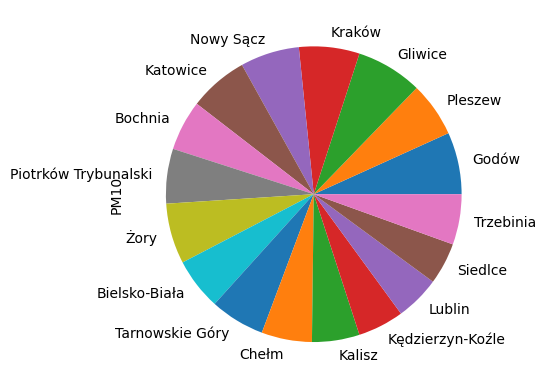

In [59]:
# Poland pie chart of PM10
cities.loc['Poland']['PM10'].plot(kind = 'pie')

<Axes: xlabel='Country,City/Town'>

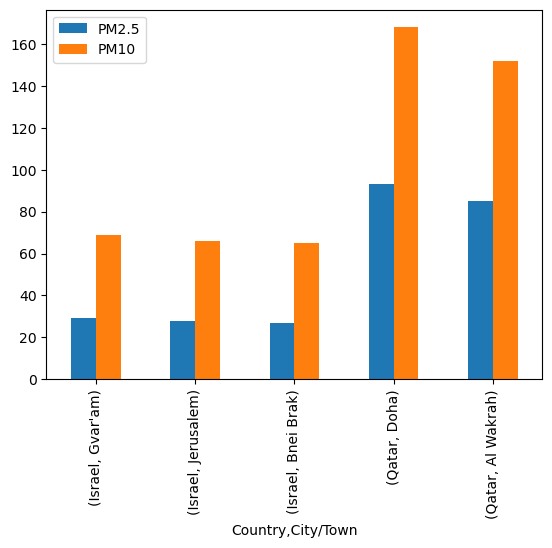

In [65]:
cities.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind = 'bar')